In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set(style="ticks")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -Alh /content/drive/MyDrive/asdf/photovoltaics

total 1.2G
-rw------- 1 root root 494K Mar  8 02:26 datetime_test.npy
-rw------- 1 root root 4.6M Mar  8 02:26 datetime_trainval.npy
-rw------- 1 root root 117M Mar  8 02:27 images_test.npy
-rw------- 1 root root 1.1G Mar  8 02:29 images_trainval.npy
-rw------- 1 root root  78K Mar  8 02:29 pv_log_test.npy
-rw------- 1 root root 727K Mar  8 02:29 pv_log_trainval.npy


test_classifier

In [4]:
datetime_trainval= pd.DataFrame(np.load('/content/drive/MyDrive/asdf/photovoltaics/datetime_trainval.npy', allow_pickle=True)[()], columns=['d_t'])


In [5]:
datetime_trainval

,d_t
0,2017-03-09 08:00:20
1,2017-03-09 08:01:20
2,2017-03-09 08:02:20
3,2017-03-09 08:03:20
4,2017-03-09 08:04:20
...,...
92970,2018-02-22 17:26:00
92971,2018-02-22 17:27:00
92972,2018-02-22 17:28:00
92973,2018-02-22 17:29:00


In [6]:
pv_log_trainval  = pd.DataFrame(np.load('/content/drive/MyDrive/asdf/photovoltaics/pv_log_trainval.npy', allow_pickle=True)[()],columns=['pv_l'])


In [7]:
pv_log_trainval

,pv_l
0,6.205507
1,6.301439
2,6.456909
3,6.599264
4,6.719098
...,...
92970,0.183711
92971,0.150079
92972,0.078483
92973,0.033711


In [8]:
images_trainval  = np.load('/content/drive/MyDrive/asdf/photovoltaics/images_trainval.npy', allow_pickle=True)[()]


In [9]:
images_trainval.shape

(92975, 64, 64, 3)

In [10]:
list_zenith_test = []
list_azimuth_test = []

In [11]:
a = datetime_trainval['d_t'].dt.dayofyear
day_list = list(a)


In [12]:
day_list[9000]

149

In [13]:
len(day_list)

92975

In [14]:
latitude = 37.427764019872384

In [15]:
math.sin(math.radians(latitude))

0.6077607207198729

In [16]:
list_azimuth_test =[]
list_zenith_test = []

In [17]:
hour_series = datetime_trainval['d_t'].dt.hour
hour_list= list(hour_series)

In [18]:
len(day_list)
# alpha = (360/24)*((hour_list[i]-12))

92975

In [19]:
for i in range(len(day_list)):
  lambd = 23.44*math.sin(math.radians(360*((day_list[i] - 80)/365.25)))
  hour_angle = (360/24)*(hour_list[i]-12)
  # alpha = (360/24)*((hour_list[i]-12))
  zenith_angle = math.acos(math.sin(math.radians(latitude))*math.sin(math.radians(lambd)) + math.cos(math.radians(latitude))*math.cos(math.radians(lambd))*math.cos(math.radians(hour_angle)))*180/np.pi
  azimth_angle = math.atan(math.sin(math.radians(hour_angle))/(math.sin(math.radians(latitude))*math.cos(math.radians(hour_angle)) - math.cos(math.radians(latitude))*math.tan(math.radians(lambd))))*180/np.pi
  list_azimuth_test.append(azimth_angle)
  list_zenith_test.append(zenith_angle)

In [20]:
power_theta_list_test= []

In [21]:
for i in range(len(day_list)):
  power_theta = 1*24.98*(math.cos(math.radians(22.5))*math.cos(math.radians(list_zenith_test[i])) + math.sin(math.radians(22.5))*math.sin(math.radians(list_zenith_test[i]))* math.cos(math.radians(list_azimuth_test[i] - 195)))
  power_theta_list_test.append(power_theta)

In [22]:
pv_log_trainval_list = list(pv_log_trainval["pv_l"])

In [23]:
len(pv_log_trainval_list)

92975

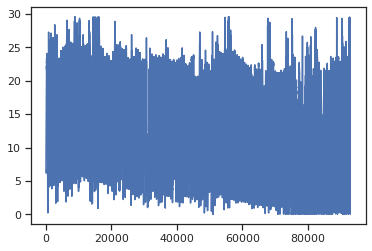

In [24]:
plt.plot(pv_log_trainval_list)

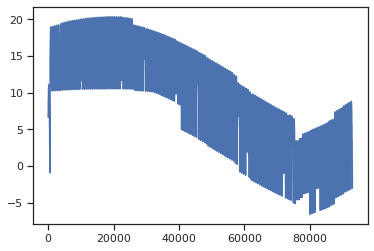

In [25]:
plt.plot(power_theta_list_test)

In [26]:
power_theta_list_test

[6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,
 6.681534899043952,


In [28]:
r = [i/j for i,j in zip ( power_theta_list_test,pv_log_trainval_list)]

In [29]:
for i in range(len(r)):
  if r[i]<0.9:
    r[i]= "cloudy"
  else:
    r[i]= "sunny"

In [30]:
len(r)

92975

In [31]:
df_label = pd.DataFrame(r, columns = ['label'])

In [32]:
df_label.to_csv('train_label.csv')